# Phase 1 - Week 2 - Day 2 PM - Decision Tree & Ensemble Learning

# A. Decision Tree - Classification

To demonstrate the use of a Decision Tree, we will use a dataset regarding car evaluation obtained from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/19/car+evaluation).

The following are the description of the dataset :

| Column | Description | Values |
| --- | --- | --- |
| buying | Level of price | `vhigh` : Very high <br> `high` : High <br> `med` : Medium <br> `low` : Low |
| maint | Price of the maintance | `vhigh` : Very high <br> `high` : High <br> `med` : Medium <br> `low` : Low |
| doors | Number of doors | `2` <br> `3` <br> `4` <br> `5more` : 5 or more |
| persons | Capacity in terms of persons to carry |`2` <br> `4` <br> `more` |
| lug_boot | The size of luggage | `small` : Small <br> `med` : Medium <br> `big` : Big |
| safety | Estimated safety of the car | `low` : Low <br> `med` : Medium <br> `high` : High |
| class | Evaluation level | `unacc` : Unacceptable <br> `acc` : Acceptable <br> `good` : Good <br> `vgood` : Very Good |

## A.1 - Data Loading

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [2]:
# Data Loading

car_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w2/P1W2D2PM%20-%20Decision%20Tree%20%26%20Ensemble%20Learning%20-%20Car%20Evaluation.csv')
car_df

,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


The next step is to change the column names to make it easier to remember the function of each column.

In [3]:
# Rename Columns

car_df.rename(columns={'buying': 'buying_price',
                       'maint': 'maintenance_cost',
                       'lug_boot': 'luggage_size',
                       'Target': 'target'
                       }, inplace=True)
car_df

,buying_price,maintenance_cost,doors,persons,luggage_size,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## A.2 - Feature Engineering

In [4]:
# Splitting between `X` and `y`

X = car_df.drop(['target'], axis=1)
y = car_df['target']
X

,buying_price,maintenance_cost,doors,persons,luggage_size,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [5]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (1296, 6)
Test size  :  (432, 6)


In [6]:
# Feature Encoding - Features
encoder = OrdinalEncoder(categories=[
    ['low', 'med', 'high', 'vhigh'],
    ['low', 'med', 'high', 'vhigh'],
    ['2', '3', '4', '5more'],
    ['2', '4', 'more'],
    ['small', 'med', 'big'],
    ['low', 'med', 'high']])
encoder.fit(X_train)

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [7]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([2, 0, 2, ..., 2, 2, 1])

In [8]:
# Save the Class Names into a Variable

classes = le.classes_
classes

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

## A.3 - Model Training & Model Evaluation

In [9]:
# Training using Decision Tree
%%time
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_encoded, y_train_encoded)

CPU times: user 45.5 ms, sys: 10.7 ms, total: 56.2 ms
Wall time: 58.1 ms


DecisionTreeClassifier(max_depth=6, random_state=10)

Decision Tree - Train


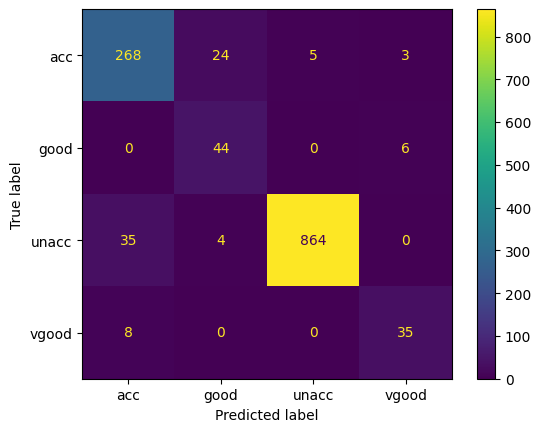

              precision    recall  f1-score   support

         acc       0.86      0.89      0.88       300
        good       0.61      0.88      0.72        50
       unacc       0.99      0.96      0.98       903
       vgood       0.80      0.81      0.80        43

    accuracy                           0.93      1296
   macro avg       0.82      0.89      0.84      1296
weighted avg       0.94      0.93      0.94      1296


Decision Tree - Test


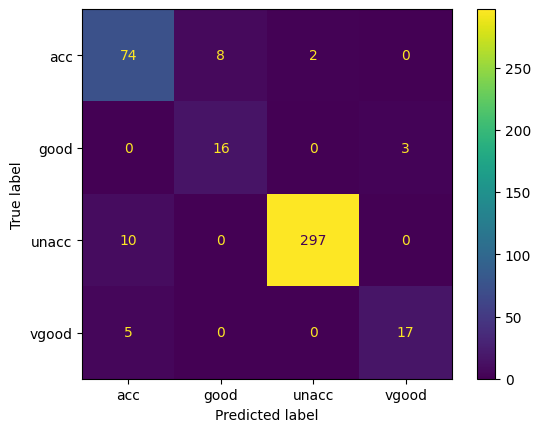

              precision    recall  f1-score   support

         acc       0.83      0.88      0.86        84
        good       0.67      0.84      0.74        19
       unacc       0.99      0.97      0.98       307
       vgood       0.85      0.77      0.81        22

    accuracy                           0.94       432
   macro avg       0.84      0.87      0.85       432
weighted avg       0.94      0.94      0.94       432



In [10]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_encoded, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_encoded, y_test_encoded, classes)

## A.4 - Visualization of the Tree

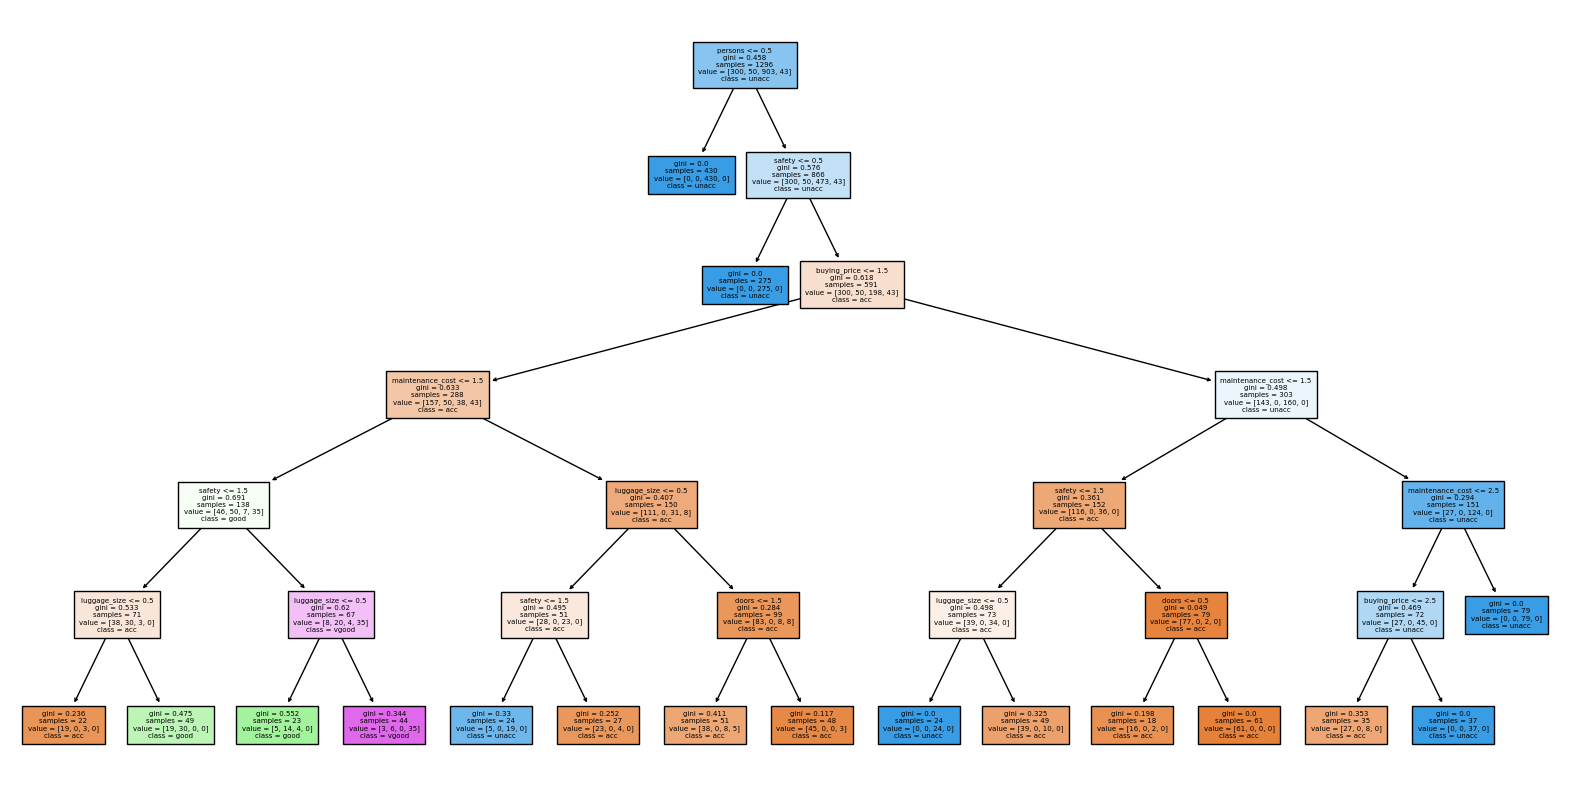

In [11]:
# Using Only Scikit-Learn

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_dt,
               feature_names=X.columns.tolist(),
               class_names=['acc', 'good', 'unacc', 'vgood'],
               filled=True,
               fontsize= 5)
plt.show()

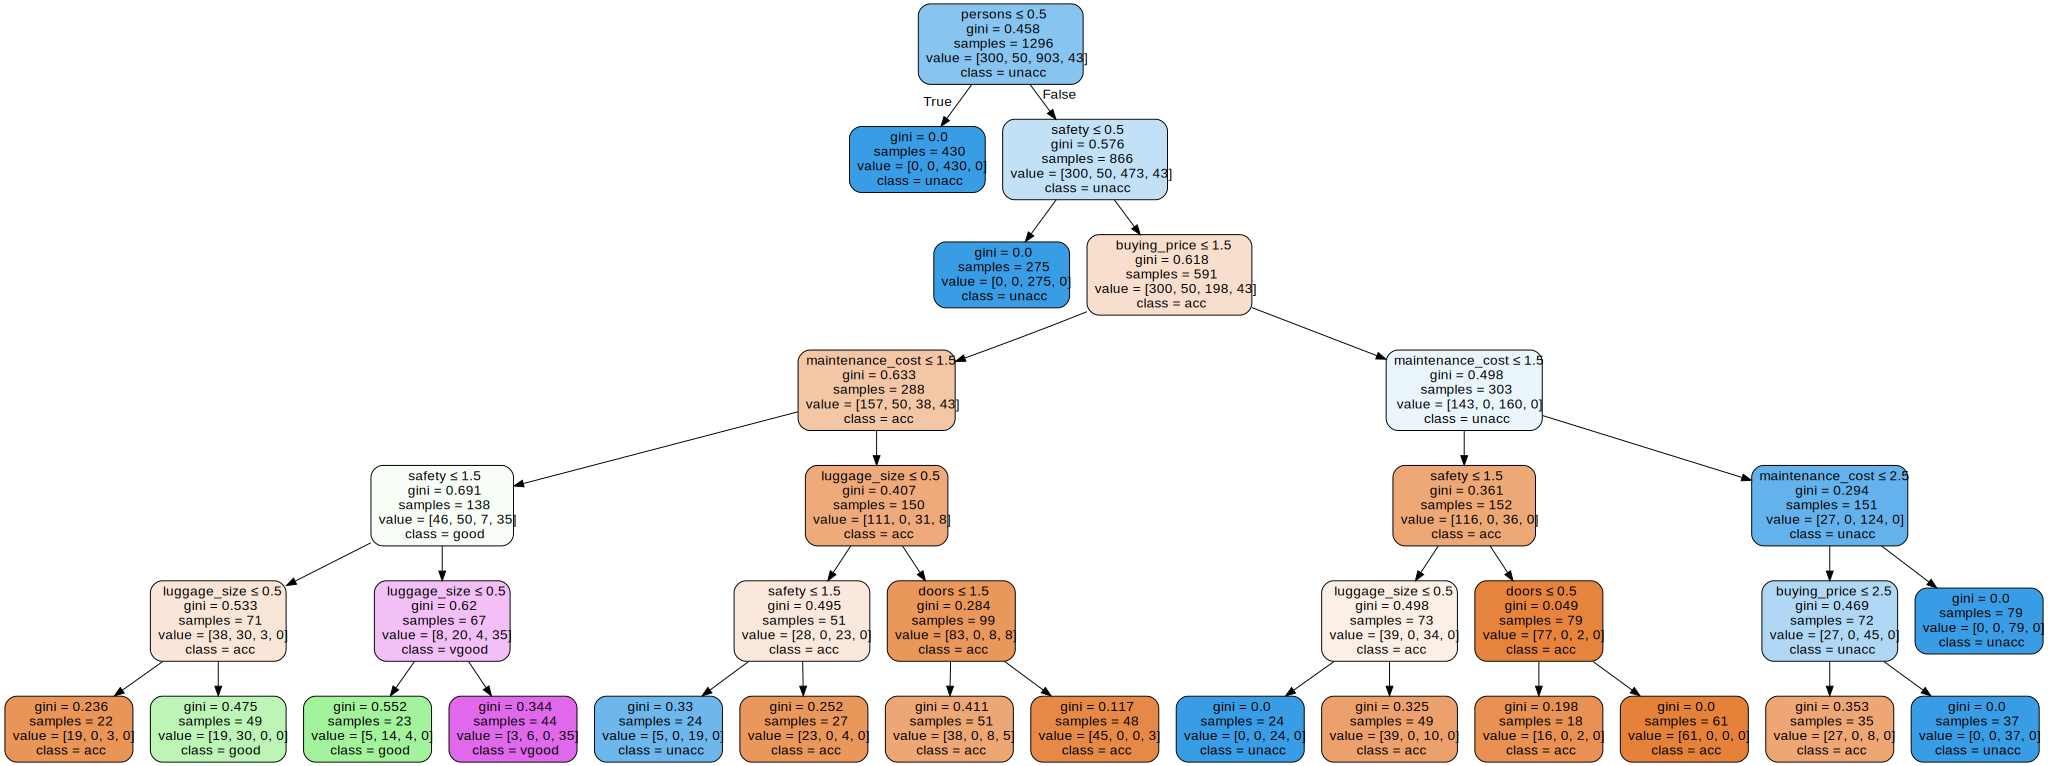

In [12]:
# Using Scikit-Learn and Graphviz

import graphviz
dot_data = tree.export_graphviz(model_dt, out_file=None,
                                feature_names=X.columns.tolist(),
                                class_names=['acc', 'good', 'unacc', 'vgood'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

**CONCLUSION**

The model is capable of detecting cars that are not roadworthy. However, the model is still unable to identify cars that are in good or very good condition.

It can be concluded that this model is only suitable for determining whether a car is usable or not. It could potentially be implemented by used car dealers when they want to add car to their collection of cars for resale to consumers.

# B. Decision Tree - Regression

Decision Trees can also be used to solve regression cases. In this demonstration, we will use a one-year fuel consumption dataset measured from various states in the US taken from the following [link](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt).

The following describes each column :

| Column | Description |
| --- | --- |
| `Petrol_tax` | Petrol tax (cents per gallon) |
| `Average_income` | Average income per month (dollars) |
| `Paved_Highways` | The number of miles of paved highway |
| `Population_Driver_licence(%)` | Proportion of population with driver's licenses |
| `Petrol_Consumption` | Consumption of petrol (millions of gallons) |

## B.1 - Data Loading

In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
# Data Loading

petrol_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w2/P1W2D2PM%20-%20Decision%20Tree%20%26%20Ensemble%20Learning%20-%20Petrol%20Consumption.csv')
petrol_df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


## B.2 - Feature Engineering

In [15]:
# Splitting between `X` and `y`

X = petrol_df.drop(['Petrol_Consumption'], axis=1)
y = petrol_df['Petrol_Consumption']

In [16]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (36, 4)
Test size  :  (12, 4)


In [17]:
# Featue Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## B.3 - Model Training & Model Evaluation

In [18]:
# Training using Decision Tree
%%time
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=4, random_state=10)
model_dt.fit(X_train_scaled, y_train)

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.91 ms


DecisionTreeRegressor(max_depth=4, random_state=10)

In [19]:
# Model Evaluation

def performance_check_regression(clf, X, y):
  y_pred = clf.predict(X)

  print('MAE  : ', mean_absolute_error(y, y_pred))
  print('MSE  : ', mean_squared_error(y, y_pred, squared=True))
  print('RMSE : ', mean_squared_error(y, y_pred, squared=False))

print('Decision Tree - Train')
performance_check_regression(model_dt, X_train_scaled, y_train)
print('')

print('Decision Tree - Test')
performance_check_regression(model_dt, X_test_scaled, y_test)

Decision Tree - Train
MAE  :  22.84135802469136
MSE  :  1008.183024691358
RMSE :  31.751897969906587

Decision Tree - Test
MAE  :  52.199999999999996
MSE  :  4675.262613168724
RMSE :  68.37589204660313


## B.4 - Visualization of the Tree

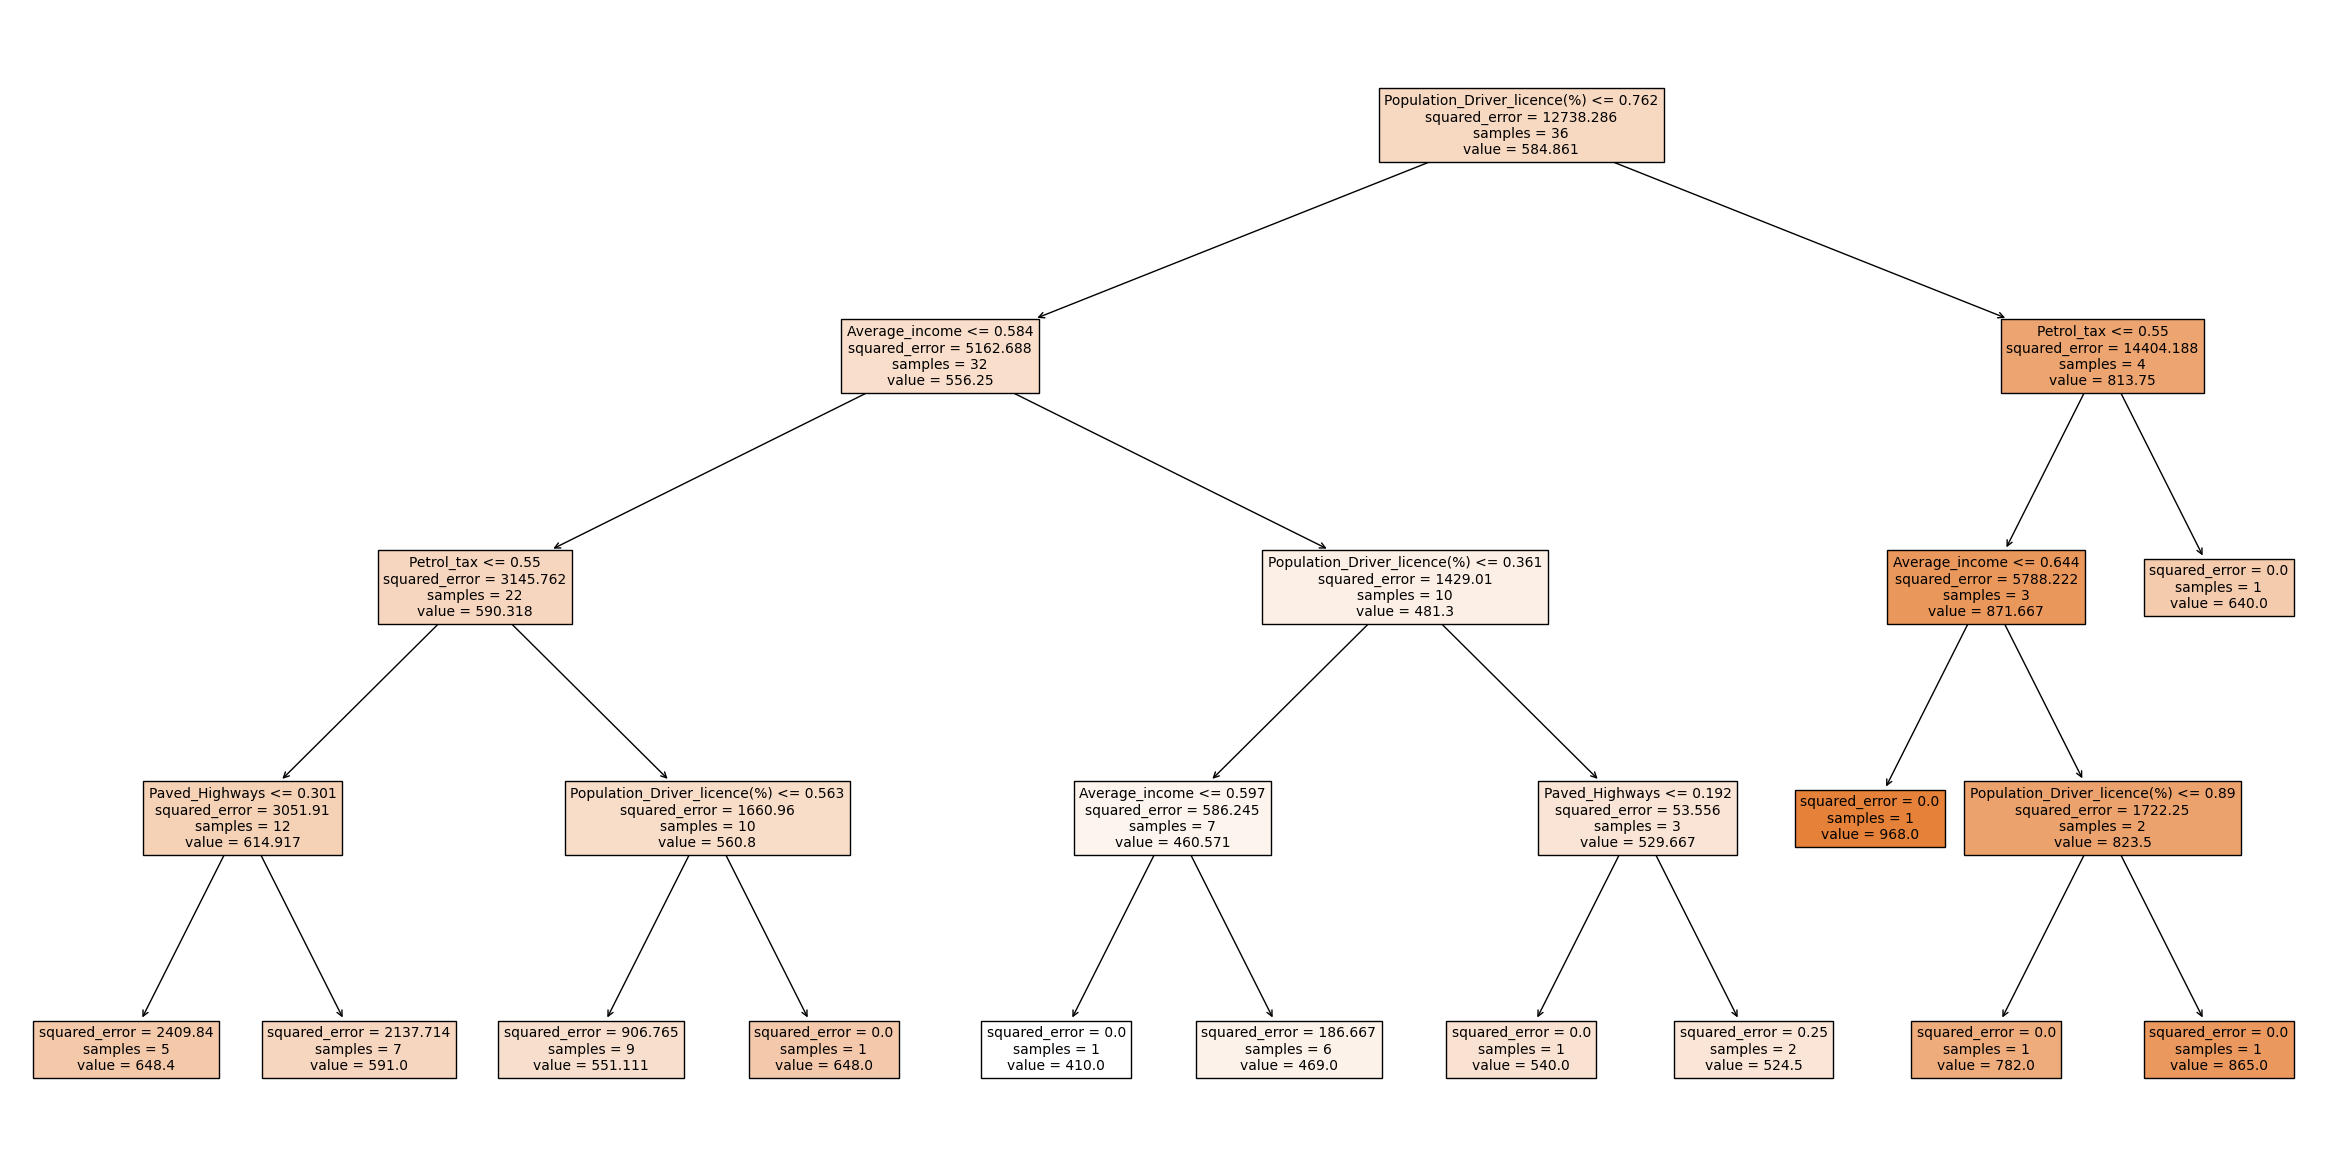

In [20]:
# Using Only Scikit-Learn to Visualize the Tree
from sklearn import tree

plt.figure(figsize=(30,15))
X.columns = X_train.columns
tree.plot_tree(model_dt, feature_names=X.columns, filled=True, fontsize= 10)
plt.show()

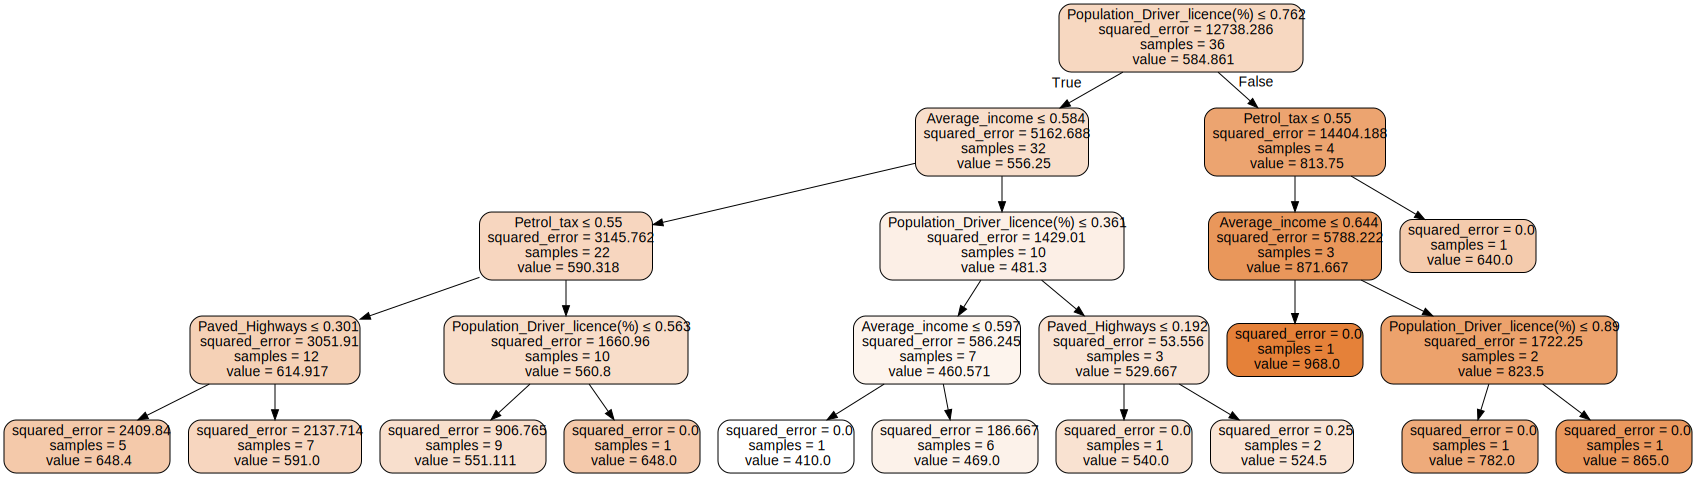

In [21]:
# Using Scikit-Learn and Graphviz to Visualize the Tree

import graphviz
dot_data = tree.export_graphviz(model_dt, out_file=None,
                                feature_names=X.columns.tolist(),
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# C. Ensemble Learning

Ensemble learning is a Machine Learning technique that **involves combining multiple individual models to create a stronger model**. This new model often more robust and more accurate. Different machine learning models may operate on different samples of the population data, different modeling techniques may be used, and a different hypothesis might be used. The strengths of each model can compensate for the weakness of others, leading to improved overall performance.

Ensemble methods aim to reduce the variance and bias of individual models, making the combined model more generalizable and better at handling different types of data. The process of creating an ensemble typically involves training multiple models on the same dataset and then combining their predictions in some way.

There are 3 types of Ensemble Learning :
1. Bagging
2. Boosting
3. Stacking

## C.1 - Data Loading

For this tutorial, we will classify with the iris dataset. Here is the brief of the dataset.

<img src='https://miro.medium.com/v2/resize:fit:4800/format:webp/1*f6KbPXwksAliMIsibFyGJw.png'>

The Iris Dataset contains four features :
1. `sepal length` (in cm)
2. `sepal width` (in cm)
3. `petal length` (in cm)
4. `petal width` (in cm)

The dataset contains 50 samples of three species of Iris : `setosa`, `virginica`, and `versicolor`.

In [22]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score

In [23]:
# Data Loading

df_iris = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w2/P1W2D1PM%20-%20KNN%20%26%20Naive%20Bayes%20-%20Iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [24]:
# Split between Features and Target
X = df_iris.drop("variety", axis=1)
y = df_iris['variety']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (127,)
Test Size  :  (23,)


In [25]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Feature Encoding Target

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

## C.2 - Voting Classifier

Voting involves training multiple models independently and then combining their predictions by allowing each model to "vote" on the final prediction.

In classification tasks, each model assigns a class label to an instance, and the class label that receives the most votes becomes the final prediction.

**Voting can be `hard` (majority class) or `soft` (weighted average of predicted probabilities).**

Voting is like Bagging but with all training data.

In [27]:
# Model Definition
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [28]:
# Model Training

## Hard Voting
voting_hard_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='hard')

## Soft Voting
voting_soft_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='soft')

voting_hard_clf.fit(X_train_scaled, y_train_encoded)
voting_soft_clf.fit(X_train_scaled, y_train_encoded)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=42))],
                 voting='soft')

**Important note :** if you want to use SVM in Voting Classifier with soft voting, make sure set the hyperparameter `probability=True`

In [29]:
# Model Evaluation

y_pred_hard = voting_hard_clf.predict(X_test_scaled)
y_pred_soft = voting_soft_clf.predict(X_test_scaled)

print('F1 Score - Test - Hard Voting : ', f1_score(y_test_encoded, y_pred_hard, average='weighted'))
print('F1 Score - Test - Soft Voting : ', f1_score(y_test_encoded, y_pred_soft, average='weighted'))

F1 Score - Test - Hard Voting :  0.9130434782608695
F1 Score - Test - Soft Voting :  0.9562176953481302


In [30]:
# Predict New Instance

new_instance = [[1.2, 1.2, 3, 2]]
new_instance = np.array(new_instance)
new_instance = scaler.transform(new_instance)
new_instance

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-6.00685638, -4.16800225, -0.47789096,  1.0226934 ]])

In [31]:
# Predict using Hard Voting Classifier

print('From Logistic Regression : ', voting_hard_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_hard_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_hard_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_hard_clf.predict(new_instance))

From Logistic Regression :  [1]
From SVM :  [0]
From Decision Tree :  [1]
Final Result :  [1]


In [32]:
# Predict using Soft Voting Classifier

print('From Logistic Regression : ', voting_soft_clf.named_estimators_['logreg'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_soft_clf.named_estimators_['svc'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_soft_clf.named_estimators_['dt'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_soft_clf.predict_proba(new_instance), ' -> Class : ', voting_soft_clf.predict(new_instance))

From Logistic Regression :  [[0.41220419 0.42196052 0.16583529]]  -> Class :  [1]
From SVM :  [[0.37380062 0.39587395 0.23032542]]  -> Class :  [0]
From Decision Tree :  [[0. 1. 0.]]  -> Class :  [1]
Final Result :  [[0.2620016  0.60594483 0.13205357]]  -> Class :  [1]


## C.3 - Bagging Classifier

In [33]:
# Model Training - Bagging Classifier - Using Logistic Regression as Base Model
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    LogisticRegression(random_state=42),
    n_estimators=100,
    random_state=42)

bag_clf.fit(X_train_scaled, y_train_encoded)

BaggingClassifier(estimator=LogisticRegression(random_state=42),
                  n_estimators=100, random_state=42)

Hyperparameter `n_estimators` represents the number of base estimator that will be used.

```
n_estimatorsint, default=10
    The number of base estimators in the ensemble.
```

In syntax above, it will create 100 Logistic Regression models.

In [34]:
# Model Evaluation

y_train_pred = bag_clf.predict(X_train_scaled)
y_test_pred = bag_clf.predict(X_test_scaled)

print('F1 Score - Train - Bagging : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Bagging :  0.968503937007874
F1 Score - Test - Bagging  :  0.9130434782608695


## C.4 - Bagging Classifer - Random Forest

Random Forest using Bagging technique with Decision Tree as its base model.

In [35]:
# Model Training - Random Forest - Using Decision Tree as Base Model
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42)

rnd_clf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(max_depth=5, random_state=42)

In [36]:
# Model Evaluation

y_train_pred = rnd_clf.predict(X_train_scaled)
y_test_pred = rnd_clf.predict(X_test_scaled)

print('F1 Score - Train - Random Forest : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Random Forest  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Random Forest :  1.0
F1 Score - Test - Random Forest  :  0.9130434782608695


## C.5 - Boosting

In Scikit-Learn, the base estimator for boosting is Decision Tree. But, we can change it into other algorithm.

In [37]:
# Model Training - Random Forest - Using SVM as Base Model
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    SVC(kernel='rbf', probability=True, random_state=42),
    n_estimators=500,
    random_state=42)
ada_clf.fit(X_train_scaled, y_train_encoded)

AdaBoostClassifier(estimator=SVC(probability=True, random_state=42),
                   n_estimators=500, random_state=42)

In [38]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_scaled)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.9763749019942828
F1 Score - Test - AdaBoost  :  0.9130434782608695


## C.6 - Stacking

In this code below, we will create a Stacking Classifier using Logistic Regression and SVM as base estimators, and then the prediction from both models will act as input for the final estimator using Decision Tree.

In [39]:
# Model Training - Stacking
from sklearn.ensemble import StackingClassifier

log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

estimators = [
     ('logreg', log_clf),
     ('svm', svm_clf)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=dt_clf)

stacking_clf.fit(X_train_scaled, y_train_encoded)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=1, random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=DecisionTreeClassifier(max_depth=6,
                                                          random_state=42))

In [40]:
# Model Evaluation

y_train_pred = stacking_clf.predict(X_train_scaled)
y_test_pred = stacking_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.9605841125062986
F1 Score - Test - AdaBoost  :  0.9562176953481302


**CONCLUSION**

The Stacking Classifier has balance performance both in training and testing. The performance from this model outperforms other models. We can say that for this problem, this is the best classifier.